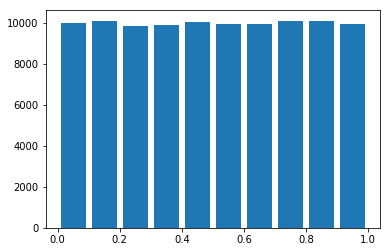

In [26]:
import numpy as np
import matplotlib.pyplot as plt


samples = np.random.uniform(0, 1, size=100000)

plt.hist(samples, rwidth = 0.8)
plt.show()

samples = samples.reshape((len(samples), 1))



In [27]:
# minimum theoretical values
def uniform_mean_error(k, d=1):
    return d/(4*k)

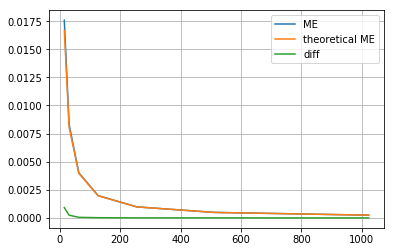

actual ME -> [0.01758360617685208, 0.0083071702616961, 0.004021569108546717, 0.001988492238852229, 0.000983561549697922, 0.0004919182723819635, 0.0002447676163433559]

theoretical ME -> [0.016666666666666666, 0.008064516129032258, 0.003968253968253968, 0.001968503937007874, 0.000980392156862745, 0.0004892367906066536, 0.00024437927663734115]


In [28]:
import sys
sys.path.insert(0, '../src')

import bin_exploration

dims = 1
sizes = [15, 31, 63, 127, 255, 511, 1023]

th_values = []
values = []

for k in sizes:
    tree = bin_exploration.Exploration_tree(dims, k)
    for sample in samples:
#         print(sample)
#         break
        tree.search_nearest_node(sample)
        
    th_values.append(uniform_mean_error(k))
    values.append(tree.get_total_value()/len(samples))
    

plt.plot(sizes, values, label='ME')
plt.plot(sizes, th_values, label='theoretical ME')
plt.plot(sizes, np.abs(np.array(th_values)-np.array(values)), label='diff')
plt.legend()
plt.grid(True)
plt.show()

print('actual ME ->', values)
print('\ntheoretical ME ->', th_values)
